# MT3510 Applied Mathematics Project 2024

Although this is a project and has some longer form elements it will be treated in a similar way to the tutorials, i.e. autograded, so make sure that you take care to create the required variables/functions. 

Before you submit this coursework, make sure everything runs as expected. You should **restart the kernel and run all cells** (in the menubar, Run$\rightarrow$Restart Kernel and Run All Cells **or** click the double triangle symbol &#x23E9;) and check all outputs are as expected.

Please see the module book for full instructions on completing coursework and submitting properly.

Make sure you *only* fill in places that say `your code goes here` or "YOUR ANSWER HERE". Replace the contents of those cells only, changing other cells may prevent grading. It is recommended to work in a copy and enter final answers in the submission version at the end.

When using matplotlib please make sure to use the inline option (not notebook) to allow grading: 
`%matplotlib inline`

### Marking breakdown

**Parts 1-3 worth 80%**

| Code 60% | Written answers 20% |
|----------|------------|
| gives correct results 40% | Understanding 15%     |
| Good practice 20%     | Clarity 5%      |

**Part 4  worth 20%** is purposefully open-ended. Depending on how you tackle this part I may weight more highly a careful discussion, or a well implemented code. I'm looking for some orginality and initiative to be demonstrated. 

## Part 1: Bilinear interpolation

There are many situations where interpolation needs to be applied to higher dimensional problems, for instance in cartography, image processing, or in simulations of physical systems. Thankfully the process for this is conceptually straightforward; we simply apply the rules of interpolation in 1D in each direction for the higher dimensional problem. The only real trouble is in the application.

In the first part of the project we will consider the case of *bilinear* interpolation, i.e. linear interpolation in two dimensions. We can derive the interpolation rule by 'convolution', or composition, of the 1D rule in each direction. 

Consider a function of two variables $f(x,y)$ on some two-dimensional domain $(x,y)\in[a,b]\times[c,d]$ then,
for instance, suppose we have sampled data points $(x_0,y_0),\,(x_1,y_0),\,(x_0,y_1)$ and $(x_1,y_1)$ at which we have $f_{00},\,f_{10},\,f_{01}$ and $f_{11}$ defined (i.e. the corners of a rectangle). To obtain an approximation of $f(x_i,y_i)$ where $x_0<x_i<x_1$ and $y_0<y_i<y_1$ we can notice that, in the $x$-direction 

$$ f(x_i,y_0) \approx f_{i0}=  \frac{x-x_1}{x_0-x_1}f_{00} + \frac{x-x_0}{x_1-x_0}f_{10} $$
$$ f(x_i,y_1) \approx f_{i1}=  \frac{x-x_1}{x_0-x_1}f_{01} + \frac{x-x_0}{x_1-x_0}f_{11} $$
is simply the Lagrange interpolant as shown in the linear interpolation notebook applied at each $y$ value. Then applying linear interpolation in $y$ we see

\begin{align*}
f(x_i,y_i) \approx f_{ii} &=  \frac{y-y_1}{y_0-y_1}f_{i0} + \frac{y-y_0}{y_1-y_0}f_{i1}\\
&= \frac{y-y_1}{y_0-y_1}\left(\frac{x-x_1}{x_0-x_1}f_{00} + \frac{x-x_0}{x_1-x_0}f_{10}\right) + \frac{y-y_0}{y_1-y_0}\left(\frac{x-x_1}{x_0-x_1}f_{01} + \frac{x-x_0}{x_1-x_0}f_{11}\right)\\
&=\frac{1}{(x_0-x_1)(y_0-y_1)}\left((y-y_1)(x-x_1)f_{00} + (y-y_1)(x-x_0)f_{10} + (y-y_0)(x-x_1)f_{01} + (y-y_0)(x-x_0)f_{11}\right)
\end{align*}

It can be shown that this interpolation formula is equivalent to weighting each sample point by the appropriate area of the rectangle formed by partitioning the grid cell at the evaluation point;

<center><img src="https://upload.wikimedia.org/wikipedia/commons/9/91/Bilinear_interpolation_visualisation.svg" width="200" ></center>

([source](https://en.wikipedia.org/wiki/Bilinear_interpolation))

In general we will be dealing with a 2D grid of data points, therefore in order to use the formula above we will need to identify the grid cell in which our evaluation point lies; this is equivalent to identifying the correct interpolating polynomial when considering piecewise linear interpolation during the lectures. 

To make life easy, here we will assume our data is on a regular grid of points, which makes identifying cells straightforward.

Consider the function of two variables

$$ f(x,y) = \sin(x)e^{-y^2} $$
on $(x,y) \in [-1,1]^2.$

Set up a Python function `f(x,y)` corresponding to this $f(x,y).$

**Create a Python function**, name it `bilinear(x0,y0,f0)`, to implement bilinear interpolation, using the formula above, and which **returns the 2D *interpolant* (Python function)**. Note that your function can assume that the knots are evenly spaced and evaluation points are within the closed interval $[0,1]^2.$ The function parameters `x0` and `y0` should be the coordinates of the knots, `f0` the data values there, and the interpolant function should itself have as its parameters the coordinates of the evaluation points, say, `xx` and `yy`, and return the interpolated values on these points. You may wish to consider how best to manage the arrays for knots and evaluation points (e.g. is a 2D meshgrid type, or 2 1D individual types most appropriate?).

Use your functions to perform bilinear interpolation on a $10\times 10$ grid, evaluating the interpolant(s) on a $100\times100$ grid on the same domain. Store the interpolated values in a numpy array named `ff1` and plot the difference between the exact $f(x,y)$ and these interpolated values on these points using the matplotlib `pcolor` command, making sure to display the values via a colour bar.

In [290]:
import numpy as np

def f(x, y):
    return np.sin(x) * np.exp(-y**2)


def bilinear(x0, y0, f0):
    def interpolant(xx_all, yy_all):
        data = np.zeros((len(yy_all), len(xx_all)))
        for idx, xx in enumerate(xx_all):
            for idy, yy in enumerate(yy_all):
                # Find the indices of the grid points
                i = np.searchsorted(x0[0, :], xx) - 1
                j = np.searchsorted(y0[:, 0], yy) - 1
                i = max(min(i, len(x0)-2), 0)
                j = max(min(j, len(y0)-2), 0)
                
                # Extract the grid points and function values
                x1, x2 = x0[0, i], x0[0, i+1]
                y1, y2 = y0[j, 0], y0[j+1, 0]
                f11, f21 = f0[j, i], f0[j, i+1]
                f12, f22 = f0[j+1, i], f0[j+1, i+1]
                
                # Perform bilinear interpolation
                fxy = ((x2 - xx) * (y2 - yy) * f11 + 
                    (xx - x1) * (y2 - yy) * f21 +
                    (x2 - xx) * (yy - y1) * f12 +
                    (xx - x1) * (yy - y1) * f22) / ((x2 - x1) * (y2 - y1))
                
                data[idy, idx] = fxy
        return data
    return interpolant

x_array = np.linspace(-1,1,10)
y_array = np.linspace(-1,1,10)
x0, y0 = np.meshgrid(np.linspace(-1,1,10),np.linspace(-1,1,10))
f0 = np.zeros((10,10))
for i in range(10):
    for j in range(10):
        f0[i,j] = f(x_array[i], y_array[j])

xx = np.linspace(-1,1,100)
yy = np.linspace(-1,1,100)

interpolant = bilinear(x0, y0, f0)
ff1 = interpolant(xx, yy)

true = np.zeros((100,100))
for i in range(100):
    for j in range(100):
        true[i,j] = f(xx[i], yy[j])

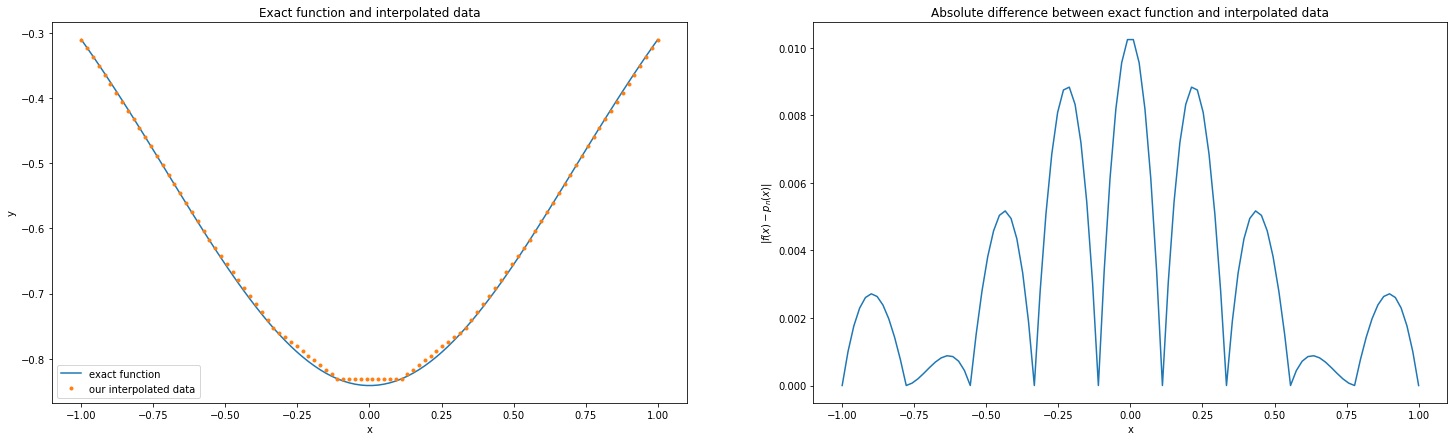

In [251]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 7))

ax1.plot(xx,true[0],label='exact function') #plot 1 
ax1.plot(xx,ff1[0],'.',label='our interpolated data') #change marker so we can see both functions
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend()
ax1.set_title('Exact function and interpolated data')

ax2.plot(xx,abs(true[0] - ff1[0])) #plot 2
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Absolute difference between exact function and interpolated data')
plt.xlabel('x')
plt.ylabel('$|f(x)-p_n(x)|$')
plt.show()

In [ ]:
# Don't edit this cell
if not "bilinear" in globals():
    raise NotImplementedError("bilinear has not been defined in Part 1")
if not "ff1" in globals():
    raise NotImplementedError("ff1 has not been defined in Part 1")
if not "f" in globals():
    raise NotImplementedError("f has not been defined in Part 1")


## Part 2: Multivariate polynomial interpolation

Instead of deriving equivalent formulae as the one above, to create higher-order multi-dimensional interpolants we can make use of the composition of the basis functions (see tutorial 9) in each direction, i.e. 

\begin{align}
l_j(x) &= \frac{x-x_0}{x_j-x_0}\dots\frac{x-x_{j-1}}{x_j-x_{j-1}}\frac{x-x_{j+1}}{x_j-x_{j+1}}\dots\frac{x-x_{n-1}}{x_j-x_{n-1}} \\
& = \prod_{k=0,\,k\neq j}^{n-1}\frac{x-x_k}{x_j-x_k}
\end{align}

for $n$ distinct knots in each direction $x_0,x_1,...,x_{n-1},$ and $y_0,y_1,...,y_{n-1},$ such that the interpolating polynomial is given by

$$
p_{n-1}(x,y) = \sum_{j=0}^{n-1}\sum_{i=0}^{n-1} l_i(x) l_j(y)f_{i,j}, 
$$

where $f_{i,j}$ is the data at the knots, the $l_i(x)$ basis functions are in the $x$-direction, hence using the knots in $x$, and the $l_j(y)$ the basis functions in $y$ using the $y$ knots. If $n=2$ we will recover the bilinear formula above. 

By using the Python function from tutorial 9 to evaluate 1D Lagrange basis functions, use a $5\times 5$ grid of knots, sampling the same $f$ as Q1, to perform a Lagrange polynomial fit, evaluating the polynomial on the $100 \times 100$ grid. Store the values in a Python array named `ff2` and plot the error. 

In the markdown cell write a short sentence or two to **describe** the accuracy of this method relative to the bilinear case above. You should give some rationale for this based on the theory discussed in lectures. 

In [257]:
# your code goes here
x_array = np.linspace(-1,1,5)
y_array = np.linspace(-1,1,5)
x0, y0 = np.meshgrid(np.linspace(-1,1,5),np.linspace(-1,1,5))
f0 = np.zeros((5,5))
for i in range(5):
    for j in range(5):
        f0[i,j] = f(x_array[i], y_array[j])


In [365]:
def p1(xp, j): 
    return lambda x : np.prod([(x - xp[i])/(xp[j] - xp[i]) for i in range(len(xp)) if i != j]) #first make a list with all elements except j, return the product of all elements<

def Lagrange_basis(xp, x):
    n = len(xp)
    myp1_funcs = [np.vectorize(p1(xp, j)) for j in range(n)] #some vectorisation, we apply the function for all j, the input is xp so we get the row associated with each j
    result_matrix = np.row_stack([myp1(x) for myp1 in myp1_funcs]) #stack the results as rows 
    return result_matrix

x_array = np.linspace(-1,1,5)
y_array = np.linspace(-1,1,5)
f1 = np.zeros((5,5))
for i in range(5):
    for j in range(5):
        f1[i,j] = f(x_array[i], y_array[j])

xx = np.linspace(-1,1,100) #evaluation points
yy = np.linspace(-1,1,100) #evaluation points
Ax = Lagrange_basis(x_array, xx) 
Ay = Lagrange_basis(y_array, yy) 
xMesh, yMesh = np.meshgrid(Ax,Ay)
zMesh = np.multiply(xMesh, yMesh)

ff2 = np.zeros((len(xx), len(yy)))
for idx, xi in enumerate(xx):
    for idy, yi in enumerate(yy):
        List = []
        for i in range(5):
            for j in range(5):  
                List.append(Ay[i,idy] * Ax[j,idx]*f1[i,j])
        ff2[idy, idx] = sum(List)


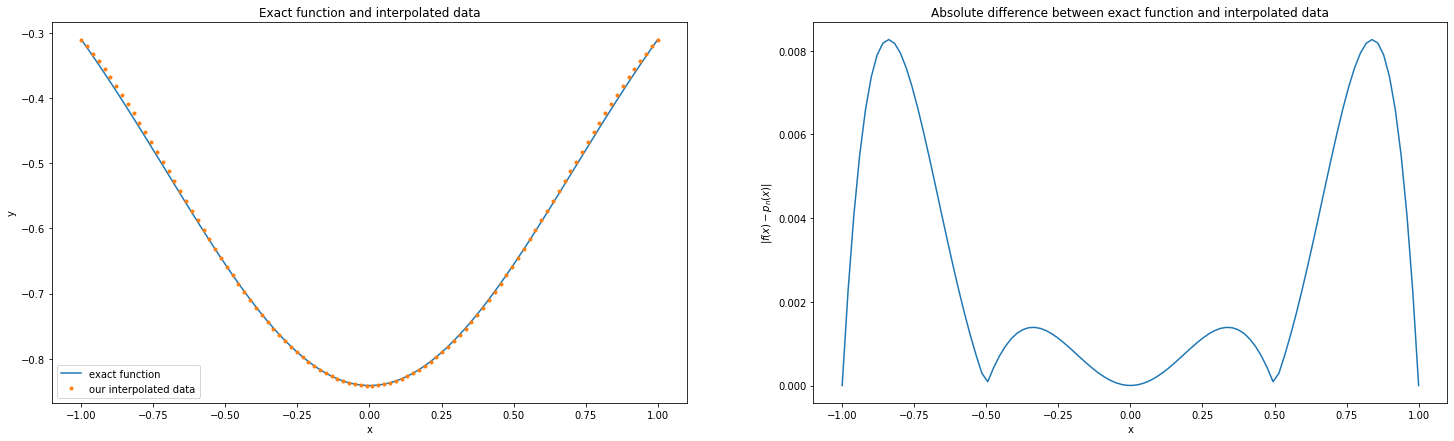

In [366]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 7))

ax1.plot(xx,true[0],label='exact function') #plot 1 
ax1.plot(xx,ff2[0],'.',label='our interpolated data') #change marker so we can see both functions
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend()
ax1.set_title('Exact function and interpolated data')

ax2.plot(xx,abs(true[0] - ff2[0])) #plot 2
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Absolute difference between exact function and interpolated data')
plt.xlabel('x')
plt.ylabel('$|f(x)-p_n(x)|$')
plt.show()

YOUR ANSWER HERE

In [ ]:
# Don't edit this cell
if not "ff2" in globals():
    raise NotImplementedError("ff2 has not been defined in Part 2")
    

## Part 3: Error Analysis 

Multivariate interpolation can also be done in Python with `scipy` and the `RegularGridInterpolator` function. 

Seek examples online and in the documentation to replicate the result of Part 1, i.e. knots in a $10\times10$ grid using **bilinear interpolation**. 

**Compute the maximum error** between the interpolant $p(x,y)$ and the exact function $f(x,y)$ when evaluated on the $100\times 100$ grid. Store the maxima in the Python variables `Error_part1` (from the part 1 result) and `Error_part3` (from the `scipy` implementation). **Print these values** with some appropriate formatting. 

Vary the number of knots $n$ in each direction and obtain the maximum error for bilinear interpolation **and bicubic spline interpolation** (you can use `RegularGridInterpolator` for both). Using these results, in the markdown cell, describe the convergence rate observed; are the trends consistent with what we have discussed in lectures? Use the same $100\times 100$ evaluation points and domain as throughout. 

You should choose the number of knots carefully such that you are able to make statements about the convergence, but your code should not require excessive computations. 

In [ ]:
# your code goes here

YOUR ANSWER HERE

In [ ]:
# Don't edit this cell
if not "Error_part1" in globals():
    raise NotImplementedError("Error_part1 has not been defined in Part 3")
if not "Error_part3" in globals():
    raise NotImplementedError("Error_part3 has not been defined in Part 3")
    

## Part 4

In this part you can get creative and launch your own investigations into interpolation. Here are some potential prompts. Only choose one prompt, or come up with your own. In each case some explanation for your methodology and discussion of results is expected in markdown. This part is worth 20% of the marks and some originality and initiative is expected.


**Missing data;** the file 'data.in' contains data (x,y,f) from a regular grid but some data is missing. Figure out where the data is missing and how to interpolate to fill in the blanks. 


**Higher dimensions;** create a similar example to that used in Part 1 but for a 3D problem, e.g. $f(x,y,z),$ and determine how one of the interpolation methods can be implemented and investigate how it performs. 


**Limits of interpolation;** do similar limits/pitfalls exist for the multivariate case as the 1D cases discussed in lectures? Try to construct an example to demonstrate. 


**Vandermode matrix;** We haven't considered how a matrix type of approach might work out in the multivariate case; can Part 2 be repeated by constructing a 2D equivalent of the Vandermode matrix described in lectures?


**Efficiency;** We expect spline interpolation to out-perform bilinear interpolation in terms of accuracy, but at what computational cost? Is it worth it?


In [1]:
# your code goes here

YOUR ANSWER HERE